## Visual EDA

In [ ]:
# Import necessary libraries
from dataidea.packages import *
from dataidea.datasets import loadDataset
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset
demo_df = loadDataset('../assets/demo_cleaned.csv', inbuilt=False, file_type='csv')

In [ ]:
demo_df.head()

,age,gender,marital_status,address,income,income_category,job_category
0,55,f,1,12,72.0,3.0,3
1,56,m,0,29,153.0,4.0,3
2,24,m,1,4,26.0,2.0,1
3,45,m,0,9,76.0,4.0,2
4,44,m,1,17,144.0,4.0,3


In [ ]:
demo_df2 = pd.get_dummies(demo_df, ['gender'], dtype=int, drop_first=1)

In [ ]:
demo_df2.head()

,age,marital_status,address,income,income_category,job_category,gender_m
0,55,1,12,72.0,3.0,3,0
1,56,0,29,153.0,4.0,3,1
2,24,1,4,26.0,2.0,1,1
3,45,0,9,76.0,4.0,2,1
4,44,1,17,144.0,4.0,3,1


### Data Distribution Plots:
   - Histograms for numerical features (age and income).
   - Bar plots for categorical features (gender, income_category, job_category etc).

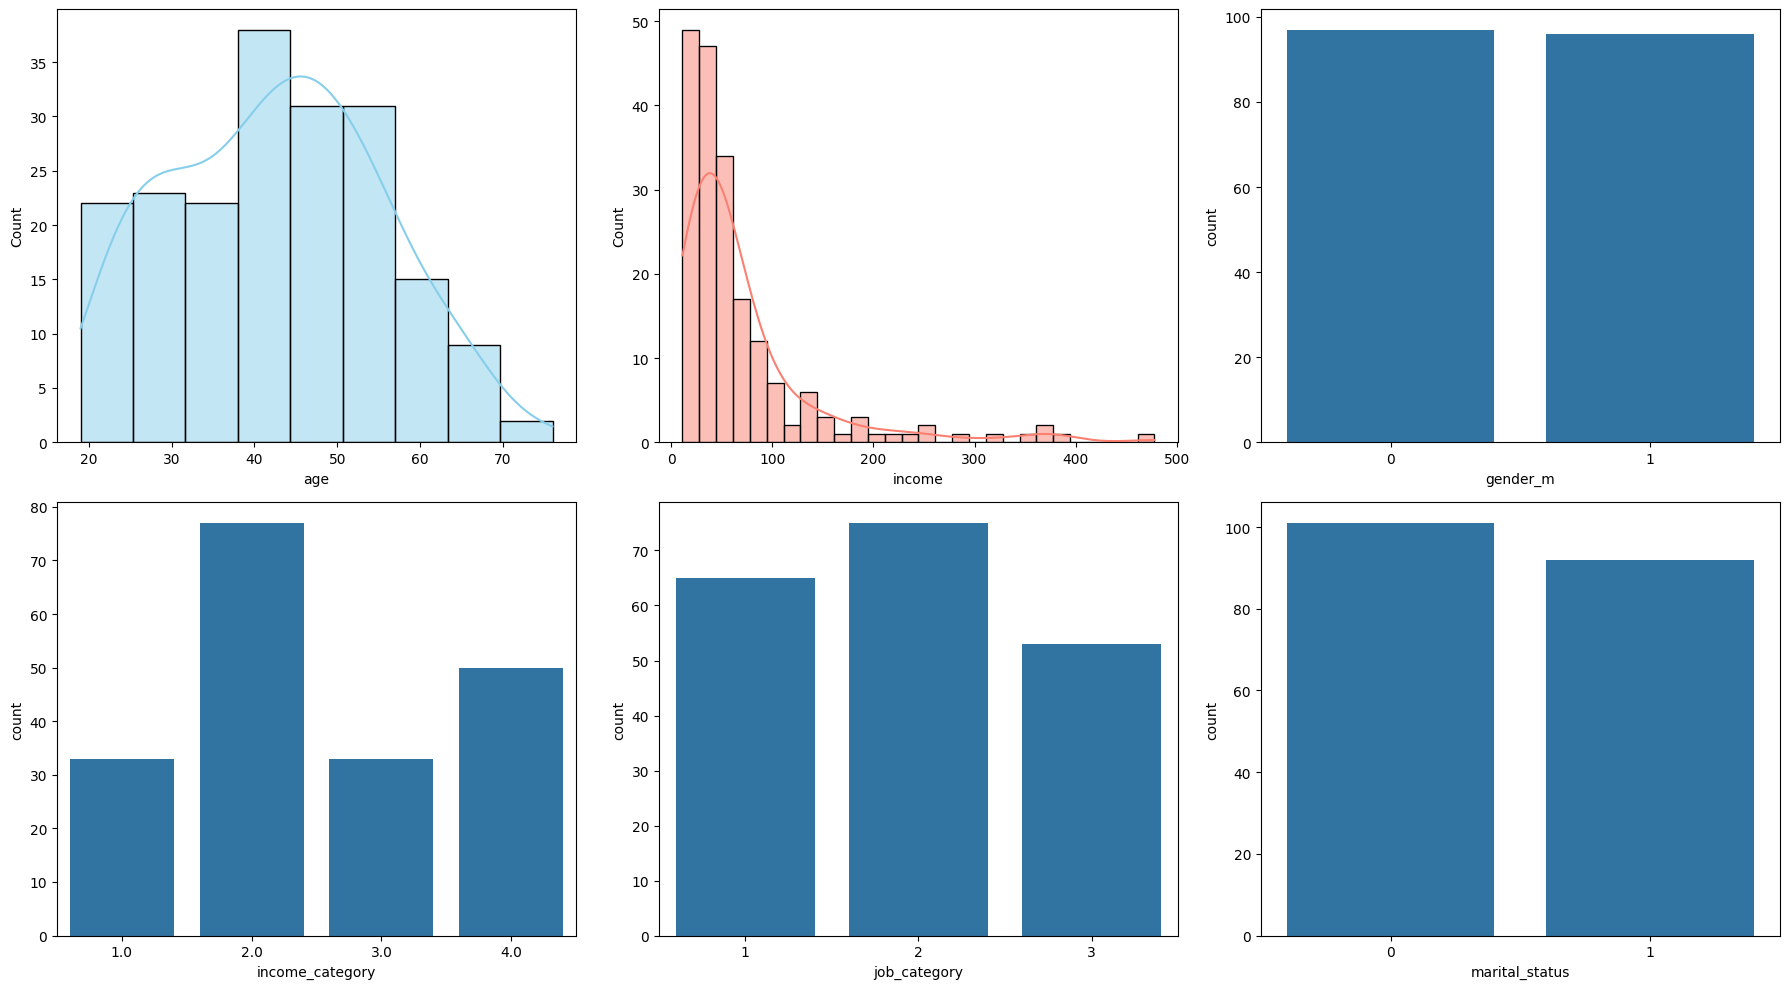

In [ ]:
# 1. Data Distribution Plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(demo_df2['age'], ax=axes[0, 0], kde=True, color='skyblue')
sns.histplot(demo_df2['income'], ax=axes[0, 1], kde=True, color='salmon')
sns.countplot(x='gender_m', data=demo_df2, ax=axes[0, 2])
sns.countplot(x='income_category', data=demo_df2, ax=axes[1, 0])
sns.countplot(x='job_category', data=demo_df2, ax=axes[1, 1])
sns.countplot(x='marital_status', data=demo_df2, ax=axes[1, 2])
plt.tight_layout()

### Pairwise Feature Scatter Plots:
   - Scatter plots of age vs. income, 

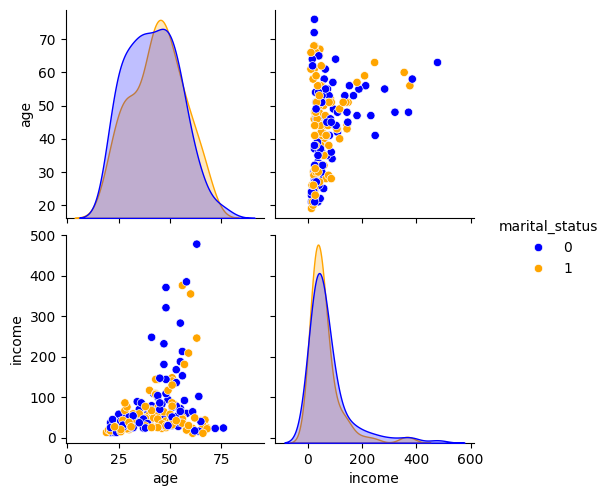

In [ ]:
# 2. Pairwise Feature Scatter Plots
g = sns.pairplot(demo_df2, vars=['age', 'income'], hue='marital_status', palette={0: 'blue', 1: 'orange'})

## Correlation Heatmap:
   - A heatmap showing the correlation between numerical features.

<Axes: >

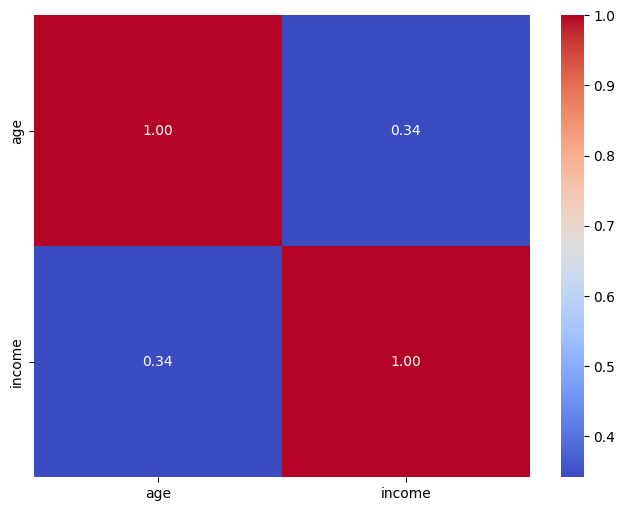

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(demo_df2[['age', 'income']].corr(), annot=True, cmap='coolwarm', fmt=".2f")

### Missing Values Matrix:
- A matrix indicating missing values in different features.

<Axes: >

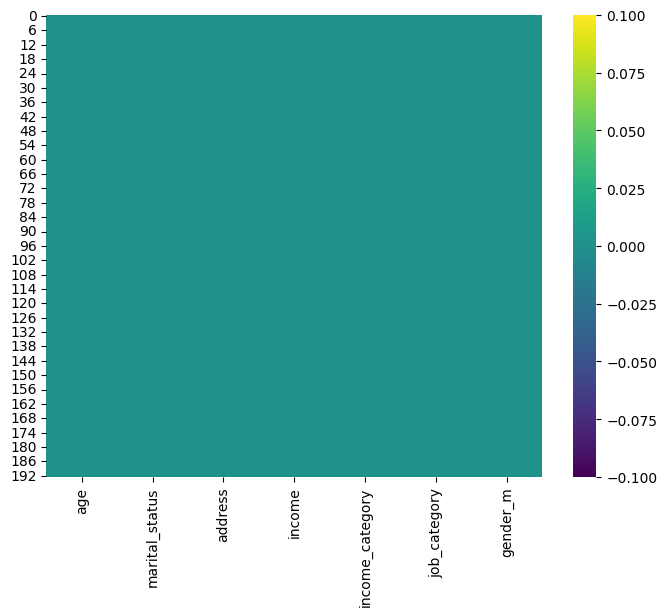

In [ ]:
# 4. Missing Values Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(demo_df2.isnull(), cmap='viridis')

5. **Feature Importance Plot**:
   - After training a model (e.g., random forest), we can visualize feature importances to see which features contribute the most to predicting survival.

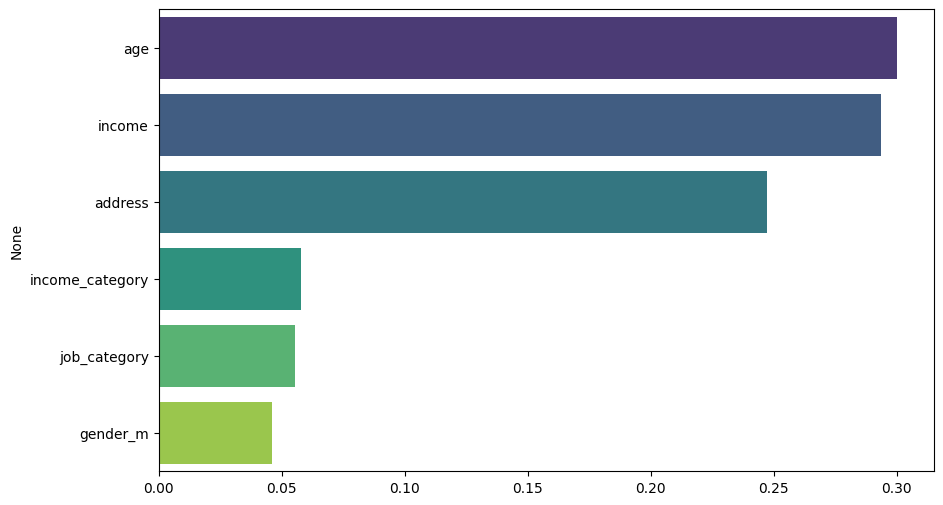

In [ ]:
# 5. Feature Importance Plot
# Prepare data for training
X = demo_df2.drop(['marital_status'], axis=1)
y = demo_df2['marital_status']

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Plot feature importances
plt.figure(figsize=(10, 6))
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis', hue=X.columns[indices])

plt.show()
